In [61]:
# El proposito de este ipynb es realizar una pureza de datos con las que trabajaremos 
# para realizar una correlacion de la informacion que el usuario envia


# Importancion de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importar la librería y establecer el índice como la primrea columna (llamada number)
df = pd.read_csv('dataset.csv', index_col=0)

display(df)

# Mostrar estadísticas generales
print(df.dtypes)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
number,,,,,,,,,,,,,,,,,,,,
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music


track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object


In [49]:
# Etapa de limpieza de datos

# Realizar el conteo de las filas con valores nulos
df.isnull().sum()

# Al no ser tantas, podemos eliminar aquellas filas con valores nulos. Usamos In Place
df.dropna(inplace = True)

In [48]:
# Identificar las canciones repetidas
# Se observa que existen canciones que se llaman igual con distintos artistas
duplicates = df.duplicated(subset=['track_name'], keep=False)
name_counts = df['track_name'].value_counts()
print(name_counts)

# Ordernar por mas reproducidas
# Ordenar por mas loud
# Obtener el genero que mas excucha la persona y con base en eso, recomendar una cancion


track_name
Run Rudolph Run                      151
Halloween                             88
Frosty The Snowman                    81
Little Saint Nick - 1991 Remix        76
Last Last                             75
                                    ... 
Mitt Gullbergs kaj paradis (Live)      1
Vill Inte Längre                       1
Så länge du är med mig                 1
Just Plain Bad                         1
Barbincor                              1
Name: count, Length: 73608, dtype: int64


In [34]:
# Agrupar por generos
genres = df.groupby(['track_genre']).size().reset_index(name='count')
# genres = df.groupby(['track_genre']).size()
genres.sort_values(by=['count'])

,track_genre,count
65,k-pop,999
0,acoustic,1000
82,power-pop,1000
81,pop-film,1000
80,pop,1000
...,...,...
32,electronic,1000
31,electro,1000
30,edm,1000
28,dub,1000


In [51]:
# Aqui cargamos el dataframe del usuario
user_df = pd.read_csv('user_df.csv', index_col='id')
display(user_df)

print(user_df.dtypes)


,name,image,artist_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
id,,,,,,,,,,,,,,,,,,,,
666PdikRnUzdvjT9p5wWND,Tomorrow's Dust,https://i.scdn.co/image/ab67616d0000b27358267b...,Tame Impala,0.616,0.8040,0,-5.568,1,0.0427,0.01240,0.099800,0.5530,0.6270,99.002,audio_features,spotify:track:666PdikRnUzdvjT9p5wWND,https://api.spotify.com/v1/tracks/666PdikRnUzd...,https://api.spotify.com/v1/audio-analysis/666P...,326840,4
2tKqhcDNVVKXJqllKzrecM,Capricorn,https://i.scdn.co/image/ab67616d0000b273c54a20...,Vampire Weekend,0.563,0.6440,7,-3.889,1,0.0318,0.15900,0.000311,0.1180,0.5250,140.022,audio_features,spotify:track:2tKqhcDNVVKXJqllKzrecM,https://api.spotify.com/v1/tracks/2tKqhcDNVVKX...,https://api.spotify.com/v1/audio-analysis/2tKq...,249560,4
7jZBPuJmkOsfPkwFD30dAA,My Girls,https://i.scdn.co/image/ab67616d0000b273a7f85f...,Animal Collective,0.508,0.9530,4,-6.031,0,0.0806,0.25600,0.044500,0.9290,0.5550,119.973,audio_features,spotify:track:7jZBPuJmkOsfPkwFD30dAA,https://api.spotify.com/v1/tracks/7jZBPuJmkOsf...,https://api.spotify.com/v1/audio-analysis/7jZB...,340787,4
2YTsPf5ejzVQzAujHlA0Gk,"Fantasie In F Minor, Op. 103, D. 940",https://i.scdn.co/image/ab67616d0000b273779b60...,Franz Schubert,0.394,0.1060,1,-22.522,1,0.0433,0.99100,0.873000,0.0875,0.1210,117.933,audio_features,spotify:track:2YTsPf5ejzVQzAujHlA0Gk,https://api.spotify.com/v1/tracks/2YTsPf5ejzVQ...,https://api.spotify.com/v1/audio-analysis/2YTs...,1027907,4
0sibHAYzpx9FJRrGRr137u,Waters of Nazareth x We Are your Friends x Pha...,https://i.scdn.co/image/ab67616d0000b27314a99b...,Justice,0.372,0.7660,7,-5.230,1,0.0757,0.00459,0.000841,0.1550,0.1510,124.248,audio_features,spotify:track:0sibHAYzpx9FJRrGRr137u,https://api.spotify.com/v1/tracks/0sibHAYzpx9F...,https://api.spotify.com/v1/audio-analysis/0sib...,391782,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2kRFrWaLWiKq48YYVdGcm8,Everything In Its Right Place,https://i.scdn.co/image/ab67616d0000b2736c7112...,Radiohead,0.296,0.4630,5,-11.412,0,0.0449,0.70500,0.048200,0.0954,0.0629,123.943,audio_features,spotify:track:2kRFrWaLWiKq48YYVdGcm8,https://api.spotify.com/v1/tracks/2kRFrWaLWiKq...,https://api.spotify.com/v1/audio-analysis/2kRF...,251427,5
00KjOnN3U40e3lXFUOue7h,10AM/Save The World (feat. Gucci Mane),https://i.scdn.co/image/ab67616d0000b2732887f8...,Metro Boomin,0.719,0.5010,8,-8.840,0,0.2390,0.25700,0.000000,0.1890,0.4190,136.025,audio_features,spotify:track:00KjOnN3U40e3lXFUOue7h,https://api.spotify.com/v1/tracks/00KjOnN3U40e...,https://api.spotify.com/v1/audio-analysis/00Kj...,226320,4
1z4835vzYgbtb26uRWpGhq,The Party,https://i.scdn.co/image/ab67616d0000b2731c0bcf...,Justice,0.661,0.8470,11,-7.343,1,0.0714,0.31400,0.004730,0.8060,0.4550,119.990,audio_features,spotify:track:1z4835vzYgbtb26uRWpGhq,https://api.spotify.com/v1/tracks/1z4835vzYgbt...,https://api.spotify.com/v1/audio-analysis/1z48...,243427,4


name                 object
image                object
artist_name          object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
type                 object
uri                  object
track_href           object
analysis_url         object
duration_ms           int64
time_signature        int64
dtype: object


In [54]:
# ---- A partir de aqui, analizaremos algunas columna con base en lo que escucha el usuario ----

# Obtener el explicit promedio


# Obtener el danceability promedio
avg_danceability_user = user_df['danceability'].mean()
print("Danceability", avg_danceability_user)

# Obtener el energy promedio
avg_energy_user = user_df['energy'].mean()
print("Energy", avg_energy_user)

# Obtener el valence promedio
avg_valence_user = user_df['valence'].mean()
print("Valence", avg_valence_user)

# Obtener el loudness promedio
avg_loudness_user = user_df['loudness'].mean()
print("Loudness", avg_loudness_user )

Danceability 0.5142333333333333
Energy 0.6349676767676767
Valence 0.3758232323232323
Loudness -8.14460606060606


In [55]:
# ---- Hacer lo mismo que para el usuario pero con las canciones más escuchadas ------------

# Obtener el danceability promedio
avg_danceability_spotify = df['danceability'].mean()
print("Danceability", avg_danceability_spotify)

# Obtener el energy promedio
avg_energy_spotify = df['energy'].mean()
print("Energy", avg_danceability_spotify)

# Obtener el valence promedio
avg_valence_spotify = df['valence'].mean()
print("Valence", avg_valence_spotify)

# Obtener el loudness promedio
avg_loudness_spotify = df['loudness'].mean()
print("Loudness", avg_loudness_spotify )


Danceability 0.5668006429880964
Energy 0.5668006429880964
Valence 0.4740659508504461
Loudness -8.258949832893272


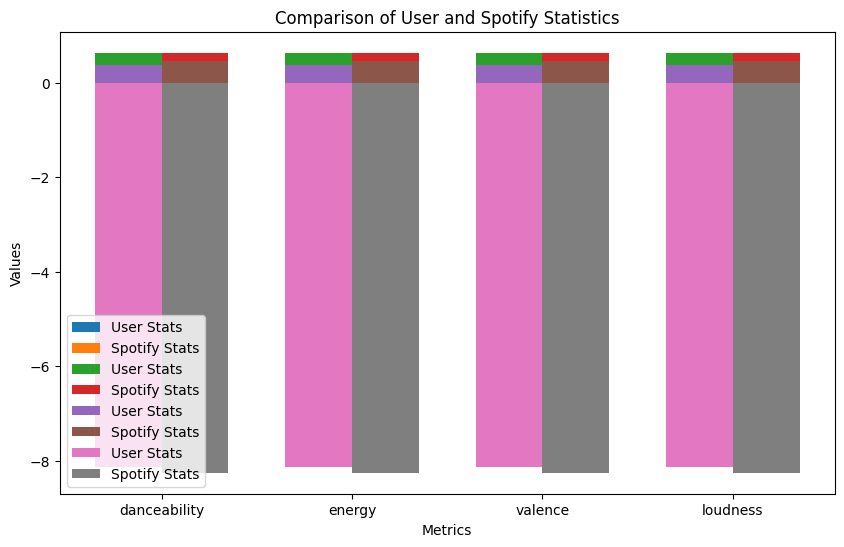

In [63]:
# Crear lista de listas ambos valores 
result_list = [['user_stats', avg_danceability_user, avg_energy_user, avg_valence_user, avg_loudness_user], 
                ['spotify_stats', avg_danceability_spotify, avg_energy_spotify, avg_valence_spotify, avg_loudness_spotify]]
 
# Crear el dataframe manual
result = pd.DataFrame(result_list, columns=['type', 'danceability', 'energy', 'valence', 'loudness'])
 
